# Importing PySpark and opening file

In [3]:
from pyspark.sql import SparkSession, functions as F
spark = SparkSession.builder.getOrCreate()

orders_df = spark.read \
                 .option('escape', '\"') \
                 .option('quote', '\"') \
                 .csv('./dataset/olist_orders_dataset.csv', header=True, multiLine=True, inferSchema=True)

reviews_df = spark.read \
                  .option('escape', '\"') \
                  .option('quote', '\"') \
                  .csv('./dataset/olist_order_reviews_dataset.csv', header=True, multiLine=True, inferSchema=True)

orders_df.printSchema()

reviews_df.printSchema()

root
 |-- order_id: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- order_status: string (nullable = true)
 |-- order_purchase_timestamp: timestamp (nullable = true)
 |-- order_approved_at: timestamp (nullable = true)
 |-- order_delivered_carrier_date: timestamp (nullable = true)
 |-- order_delivered_customer_date: timestamp (nullable = true)
 |-- order_estimated_delivery_date: timestamp (nullable = true)

root
 |-- review_id: string (nullable = true)
 |-- order_id: string (nullable = true)
 |-- review_score: integer (nullable = true)
 |-- review_comment_title: string (nullable = true)
 |-- review_comment_message: string (nullable = true)
 |-- review_creation_date: timestamp (nullable = true)
 |-- review_answer_timestamp: timestamp (nullable = true)



# Selecting all orders ids and their respective purchase delivery time

In [4]:
orders_df = orders_df.withColumn('purchase_delivery_time', F.datediff('order_delivered_customer_date', 'order_purchase_timestamp')) \
                     .filter(F.col('order_status') == 'delivered').select('order_id', 'purchase_delivery_time')
orders_df.show()

orders_df = orders_df.join(reviews_df, orders_df.order_id == reviews_df.order_id).select('purchase_delivery_time', 'review_score')

orders_df.show()

+--------------------+----------------------+
|            order_id|purchase_delivery_time|
+--------------------+----------------------+
|e481f51cbdc54678b...|                     8|
|53cdb2fc8bc7dce0b...|                    14|
|47770eb9100c2d0c4...|                     9|
|949d5b44dbf5de918...|                    14|
|ad21c59c0840e6cb8...|                     3|
|a4591c265e18cb1dc...|                    17|
|6514b8ad8028c9f2c...|                    10|
|76c6e866289321a7c...|                    10|
|e69bfb5eb88e0ed6a...|                    18|
|e6ce16cb79ec1d90b...|                    13|
|34513ce0c4fab462a...|                     6|
|82566a660a982b15f...|                    12|
|5ff96c15d0b717ac6...|                     5|
|432aaf21d85167c2c...|                    11|
|dcb36b511fcac050b...|                    14|
|403b97836b0c04a62...|                    18|
|116f0b09343b49556...|                    13|
|85ce859fd6dc634de...|                     6|
|83018ec114eee8641...|            

# Ploting the violin graph with the review_score and the purchase_delivery_time

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


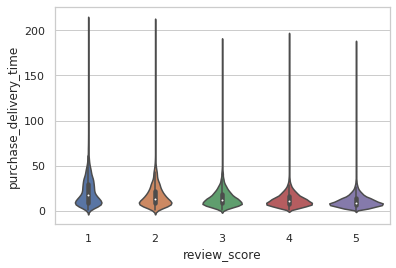

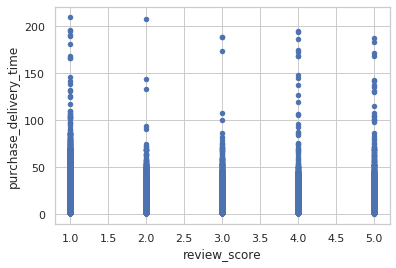

In [10]:
import seaborn as sns
import pandas as pd
sns.set(style="whitegrid")
ax = sns.violinplot(x='review_score', y='purchase_delivery_time', data=orders_df.toPandas())
orders_df.toPandas().plot(x ='review_score', y='purchase_delivery_time', kind = 'scatter')